In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [5]:
# Define the ticker symbol
ticker = 'PFE'

# Get the ticker object
stock = yf.Ticker(ticker)

# Get dividends data
dividends = stock.dividends
print("Dividends:")
print(dividends.head())

Dividends:
Date
1972-08-29 00:00:00-04:00    0.003163
1972-11-28 00:00:00-05:00    0.004151
1973-02-28 00:00:00-05:00    0.003163
1973-05-30 00:00:00-04:00    0.003163
1973-08-28 00:00:00-04:00    0.003163
Name: Dividends, dtype: float64


In [7]:
# Convert the Series to a DataFrame
dividends_df = dividends.reset_index()

# Rename the columns
dividends_df.columns = ['Date', 'Dividend']
dividends_df['Year'] = dividends_df['Date'].dt.year
x = np.array([i for i in range(65)])

# Display the DataFrame
print(dividends_df)


                         Date  Dividend  Year
0   1972-08-29 00:00:00-04:00  0.003163  1972
1   1972-11-28 00:00:00-05:00  0.004151  1972
2   1973-02-28 00:00:00-05:00  0.003163  1973
3   1973-05-30 00:00:00-04:00  0.003163  1973
4   1973-08-28 00:00:00-04:00  0.003163  1973
..                        ...       ...   ...
205 2023-11-09 00:00:00-05:00  0.410000  2023
206 2024-01-25 00:00:00-05:00  0.420000  2024
207 2024-05-09 00:00:00-04:00  0.420000  2024
208 2024-07-26 00:00:00-04:00  0.420000  2024
209 2024-11-08 00:00:00-05:00  0.420000  2024

[210 rows x 3 columns]


In [9]:
df = dividends_df.drop_duplicates(subset=['Dividend'])

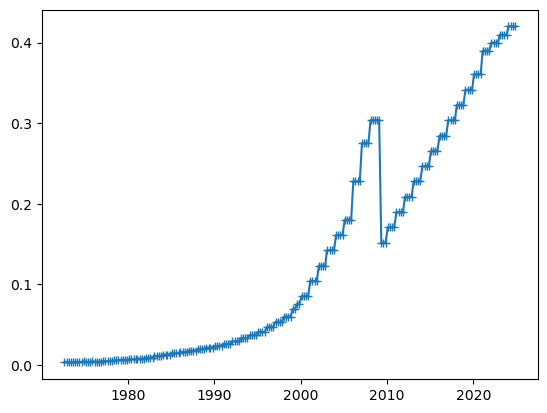

In [25]:

plt.plot(dividends_df['Date'], dividends_df['Dividend'], marker = '+' )

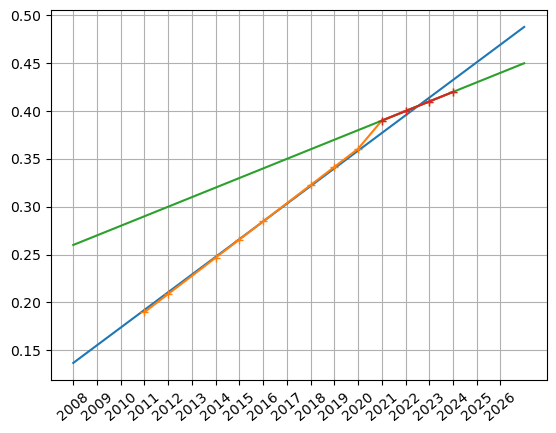

In [119]:
Data_1 = df[df['Year'] > 2010].copy()
#plt.plot(Data_1['Date'], Data_1['Dividend'], marker = '+' )

def optim(a, b):
    z2 = np.polyfit(a, b, 1)
    mymodel2 = np.poly1d(z2)
    xs2 = np.linspace(2008, 2027, 100)
    plt.plot(xs2, mymodel2(xs2) , )
    plt.plot(a, b, marker = '+' )
    plt.xticks([i for i in np.arange(2008,2027,1)],rotation=40)
    return z2

z1 = optim(Data_1['Year'], Data_1['Dividend'])
z2 = z = optim(Data_1['Year'][-4:], Data_1['Dividend'][-4:])

plt.grid()



In [193]:
Data_1.reset_index(drop=True)
Data_1.drop(['Date'], axis=1)

def predict(z_list, inic, fin):
    year = np.array([i for i in range(inic, fin,1)])
    divid = z_list[0]*year + z_list[1]
    prd_dict = {'Year':year,
                'Dividend': divid}
    return pd.DataFrame(prd_dict)

modelo1 = predict(z1,2025,2035)
display(predict(z2,2025,2030))

,Year,Dividend
0,2025,0.43
1,2026,0.44
2,2027,0.45
3,2028,0.46
4,2029,0.47


In [187]:
investment = 1000 # inicial investment
Price = 26.17   #fisrt asumption, the price of pfe is not going to change
Stocks = investment/Price

In [195]:
new_df = modelo1.loc[modelo1.index.repeat(4)].reset_index(drop=True)
new_df['Quarter'] = (new_df.index % 4) + 1
new_df.insert(0, 'Price', Price)
print(new_df)

    Price  Year  Dividend  Quarter
0   26.17  2025  0.450985        1
1   26.17  2025  0.450985        2
2   26.17  2025  0.450985        3
3   26.17  2025  0.450985        4
4   26.17  2026  0.469476        1
5   26.17  2026  0.469476        2
6   26.17  2026  0.469476        3
7   26.17  2026  0.469476        4
8   26.17  2027  0.487966        1
9   26.17  2027  0.487966        2
10  26.17  2027  0.487966        3
11  26.17  2027  0.487966        4
12  26.17  2028  0.506457        1
13  26.17  2028  0.506457        2
14  26.17  2028  0.506457        3
15  26.17  2028  0.506457        4
16  26.17  2029  0.524947        1
17  26.17  2029  0.524947        2
18  26.17  2029  0.524947        3
19  26.17  2029  0.524947        4
20  26.17  2030  0.543438        1
21  26.17  2030  0.543438        2
22  26.17  2030  0.543438        3
23  26.17  2030  0.543438        4
24  26.17  2031  0.561929        1
25  26.17  2031  0.561929        2
26  26.17  2031  0.561929        3
27  26.17  2031  0.5

In [197]:
acciones, QuarterP, Rebuy, stocks, Balance = [],[],[],[],[]
for i in new_df.index:
    if i == 0:
        acciones.append(Stocks)
        QuarterP.append(new_df['Dividend'][0] * Stocks)
        Rebuy.append(QuarterP[0]/ new_df['Price'][0])
        stocks.append(acciones[0]+Rebuy[0])
        
    else:
        acciones.append(stocks[i-1])
        QuarterP.append(new_df['Dividend'][i] * Stocks)
        Rebuy.append(QuarterP[i]/ new_df['Price'][i])
        stocks.append(acciones[i]+Rebuy[i])

new_df['Stocks_bef_qrtpay'] = acciones
new_df['Quarter_payment'] = QuarterP
new_df['Rebuy'] = Rebuy
new_df['Stocks_aft_qrtpay'] = stocks
display(new_df)

,Price,Year,Dividend,Quarter,Stocks_bef_qrtpay,Quarter_payment,Rebuy,Stocks_aft_qrtpay
0,26.17,2025,0.450985,1,38.211693,17.232897,0.658498,38.870191
1,26.17,2025,0.450985,2,38.870191,17.232897,0.658498,39.528689
2,26.17,2025,0.450985,3,39.528689,17.232897,0.658498,40.187187
3,26.17,2025,0.450985,4,40.187187,17.232897,0.658498,40.845685
4,26.17,2026,0.469476,1,40.845685,17.939456,0.685497,41.531182
5,26.17,2026,0.469476,2,41.531182,17.939456,0.685497,42.216679
6,26.17,2026,0.469476,3,42.216679,17.939456,0.685497,42.902176
7,26.17,2026,0.469476,4,42.902176,17.939456,0.685497,43.587673
8,26.17,2027,0.487966,1,43.587673,18.646014,0.712496,44.300169
9,26.17,2027,0.487966,2,44.300169,18.646014,0.712496,45.012665


,Price,Year,Dividend,Quarter,Stocks_bef_qrtpay,Quarter_payment,Rebuy,Stocks_aft_qrtpay
0,26.17,2025,0.450985,1,3.821169,1.723290,0.065850,3.887019
1,26.17,2025,0.450985,2,3.887019,1.723290,0.065850,3.952869
2,26.17,2025,0.450985,3,3.952869,1.723290,0.065850,4.018719
3,26.17,2025,0.450985,4,4.018719,1.723290,0.065850,4.084569
4,26.17,2026,0.469476,1,4.084569,1.793946,0.068550,4.153118
5,26.17,2026,0.469476,2,4.153118,1.793946,0.068550,4.221668
6,26.17,2026,0.469476,3,4.221668,1.793946,0.068550,4.290218
7,26.17,2026,0.469476,4,4.290218,1.793946,0.068550,4.358767
8,26.17,2027,0.487966,1,4.358767,1.864601,0.071250,4.430017
9,26.17,2027,0.487966,2,4.430017,1.864601,0.071250,4.501266


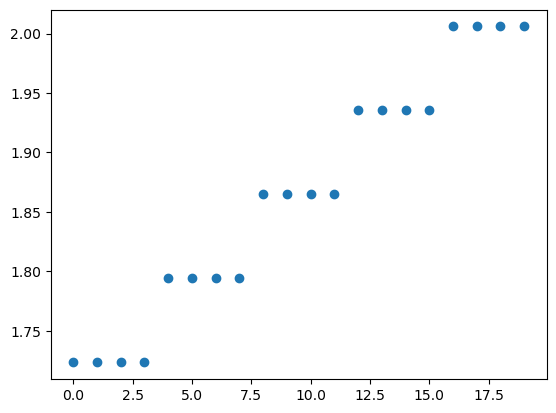

In [185]:
plt.scatter(new_df.index, new_df['Quarter_payment'], label='Data')

In [95]:
year = np.array([i for i in range(2008, 2030,1)])
divid = z[0]*year + z[1]
print(year, divid)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029] [0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39
 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47]


In [175]:
y = df['Dividend']
from scipy.optimize import curve_fit

Optimal parameters: [-0.10039603  0.16657032]


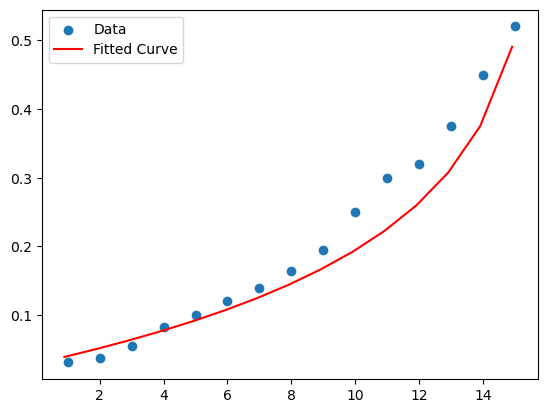

In [85]:
# Filter out non-positive x values
mask = x > 0
x_filtered = x[mask]
y_filtered = y[mask]

# Define your model function
def model_func(t, a, b):
    return a + b * np.log(t)

# Fit the curve
try:
    popt, pcov = curve_fit(model_func, x_filtered, y_filtered, p0=[1, 1], maxfev=10000)
    print("Optimal parameters:", popt)
except RuntimeError as e:
    print("Error during curve fitting:", e)

# Plotting (optional)
plt.scatter(x_filtered, y_filtered, label='Data')
plt.plot(-x_filtered+15.9, 0.39-model_func(x_filtered, *popt), color='red', label='Fitted Curve')
plt.legend()
plt.show()

In [143]:
x = df['Year']-2007
x

0      1
5      2
9      3
13     4
17     5
21     6
25     7
29     8
33     9
37    10
41    11
45    12
49    13
53    14
57    15
61    16
Name: Year, dtype: int32

In [182]:
import matplotlib

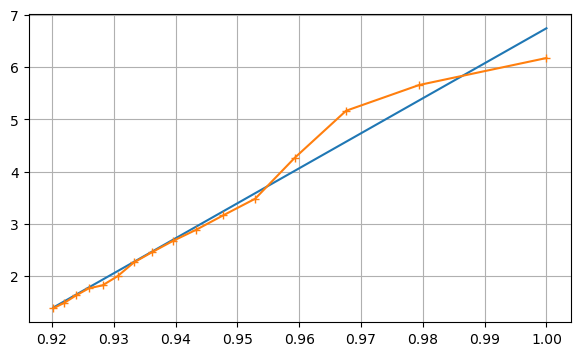

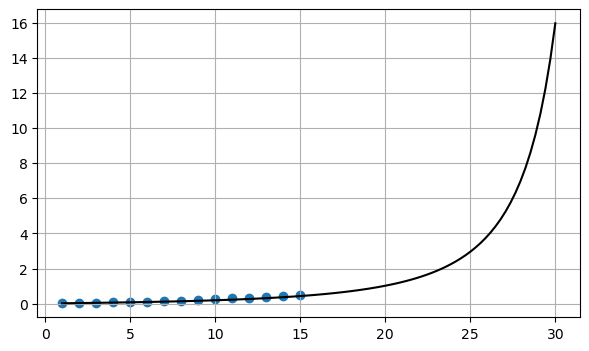

In [233]:
matplotlib.rcParams['figure.figsize'] = (7,4)

a1 = 0.03
b1 = 0.5

def optim(a, b):
    z2 = np.polyfit(1/x**a, 1/y**b, 1)
    mymodel2 = np.poly1d(z2)
    xs2 = np.linspace(1/x[-1:]**a, 1, 100)
    plt.plot(xs2, mymodel2(xs2) , )
    plt.plot(1/x**a, 1/y**b, marker = '+' )
    plt.grid()
    plt.show()
    return z2

z = optim(a1, b1)

def org(a,b):
    xs = np.linspace(1, 30, 100)
    y1 = (1/(z[0]/(xs**a) + z[1]))**(1/b)
    plt.plot(xs, y1, c='k' , linestyle = '-' )
    plt.scatter(x_filtered, y_filtered, label='Data')
    plt.grid()
    plt.show()

org(a1, b1)

In [218]:
year = np.array([i for i in range(15,26,1)])

In [230]:
future_div = (1/(z[0]/(year**a1) + z[1]))**(1/b1)

In [231]:
future_div

array([0.43289489, 0.50980323, 0.60216716, 0.7140983 , 0.85112715,
       1.02082552, 1.23376964, 1.5050735 , 1.85691174, 2.32283145,
       2.95545668])

In [222]:
ini_stonk = 1
acciones = np.zeros(11)
re_stonks = np.zeros(11)
div_pay = np.zeros(11)

fut_precio = 314 + 27.4* (year-15)
print(fut_precio)

for i in range(0,11,1):
    if i == 0     
        div_pay[0] = future_div*ini_stonk 
        re_stonks[0] = fut_precio[0]/div_pay[0]
    else:
        div_pay[i] = future_div* 
        re_stonks[i] = fut_precio[i]/div_pay[i]
    


[314.  341.4 368.8 396.2 423.6 451.  478.4 505.8 533.2 560.6 588. ]


In [228]:
for i in range(0,11,1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [67]:
# Prepare data for regression
x_data = df['Year']
y_data = df['Dividend']

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Provide initial guesses and bounds for parameters
initial_guess = [y_data.iloc[0], 0.01]  # Initial guesses for a and b
bounds = (0, [np.inf, 1])  # a > 0, b < 1

# Fit the model to the data
try:
    params, covariance = curve_fit(exponential_func, x_data, y_data, p0=initial_guess, bounds=bounds)
    
    # Extract fitted parameters
    a, b = params

    # Generate x values for plotting the fitted curve
    x_fit = np.linspace(x_data.min(), x_data.max(), 100)
    y_fit = exponential_func(x_fit, a, b)

    # Plot the original data and the fitted curve
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label='Exponential Fit', color='red')
    plt.title('Exponential Regression of Dividends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Dividend')
    plt.legend()
    plt.grid()
    plt.show()

    # Print the parameters of the fitted model
    print(f"Fitted parameters:\na = {a}, b = {b}")

except RuntimeError as e:
    print(f"An error occurred during fitting: {e}")

An error occurred during fitting: Optimal parameters not found: The maximum number of function evaluations is exceeded.
